# Taylor models of univariate functions

(by Sean Cowan)

This notebook introduces the application of Taylor models to univariate functions.

## Importing stuff

In [1]:
from pyaudi import gdual_double as gdual, taylor_model, int_d
from pyaudi import exp, log, sin
import numpy as np
import scipy as sci
from itertools import product
import matplotlib.pyplot as plt
import matplotlib.colors as col
import seaborn as sns

from plotting_functions import plot_orders

## Exponential

First, an exponential function is used to plot the Taylor Model of the function on the domain $[-0.5, 0.5]$. The exponential is chosen as it monotically increases, which should make it easy for a truncated Taylor series of a low order to approximate the function reasonably well. The function is defined as:
$$f(x) = e^x$$

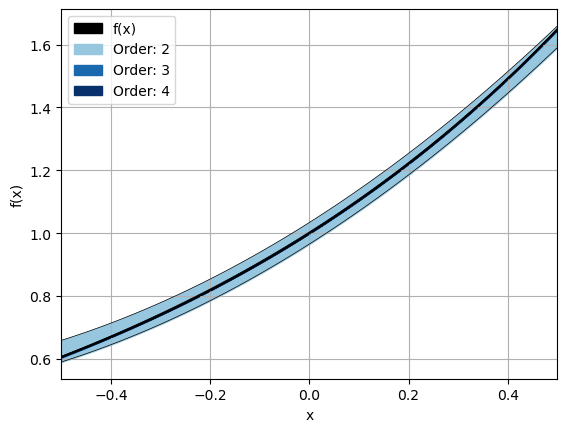

In [2]:
def func(x):
    if isinstance(x, taylor_model):
        return exp(x)
    elif isinstance(x, float):
        return np.exp(1) ** x

domain_size = 0.5
exp_points = {"x": 0.0}
dom = {"x": int_d(exp_points["x"] - domain_size, exp_points["x"] + domain_size)}
rem = int_d(0.0, 0.0)

ax = plot_orders(func, rem, exp_points, dom, orders=[2, 3, 4], buffer=0.0)
ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('f(x)'); # <-- to suppress notebook text output
plt.show()

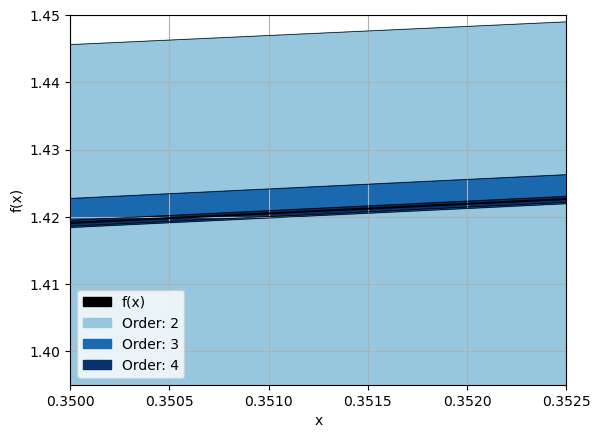

In [3]:
ax = plot_orders(func, rem, exp_points, dom, orders=[2, 3, 4], buffer=0.0)
ax.grid()
ax.set_xlim([0.35, 0.3525])
ax.set_ylim([1.395, 1.45])
ax.set_xlabel('x')
ax.set_ylabel('f(x)');

## Sine wave

Second, the Taylor model of a sine function is plotted on the domain $[0, 2 \pi]$. The sine wave is periodic, and therefore more difficult to approximate. It can be seen that higher orders are needed to approximate the function with the same level of accuracy as compared to the exponential function. The function is defined as:
$$f(x) = \sin(x)$$

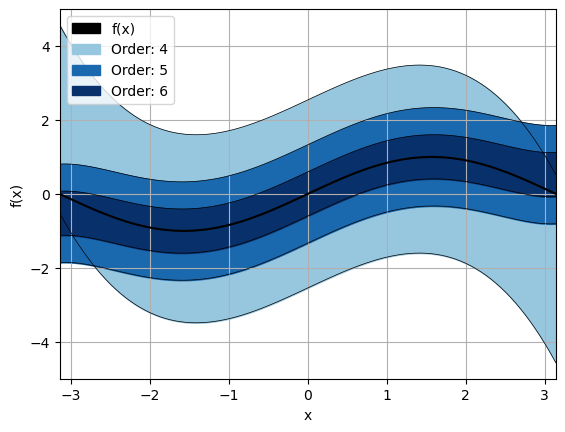

In [4]:
def func(x):
    if isinstance(x, taylor_model):
        return sin(x)
    else:
        return np.sin(x)

domain_size = 3.14
exp_points = {"x": 0.0}
dom = {"x": int_d(exp_points["x"] - domain_size, exp_points["x"] + domain_size)}
rem = int_d(0.0, 0.0)

ax = plot_orders(func, rem, exp_points, dom, orders=[4, 5, 6], buffer=0.0)
ax.grid()
ax.set_ylim([-5, 5])
ax.set_ylabel('f(x)')
ax.set_xlabel('x');

Here, we show what it looks like if you center the expansion around a point that is not at the center of the domain, but rather at the edge.

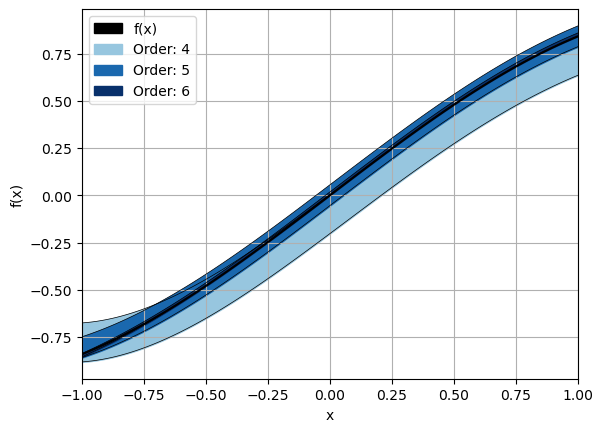

In [5]:
def func(x):
    if isinstance(x, taylor_model):
        return sin(x)
    else:
        return np.sin(x)

exp_points = {"x": 0.9}
dom = {"x": int_d(-1.0, 1.0)}
rem = int_d(0.0, 0.0)

ax = plot_orders(func, rem, exp_points, dom, orders=[4, 5, 6], buffer=0.0)
ax.grid()
# ax.set_ylim([-5, 5])
ax.set_ylabel('f(x)')
ax.set_xlabel('x');

## 6-th order power-sine

Finally, a 6-th order power-sine function is used as a more challenging example. The Taylor model of the function is evaluated on the domain $[-0.5, 1.0]$. The function is defined as:
$$f(x) = x \cdot (x - 1.1) \cdot (x + 2) \cdot (x + 2.2) \cdot (x + 2.5) \cdot (x + 3) \cdot \sin(1.7 \cdot x + 0.5)$$

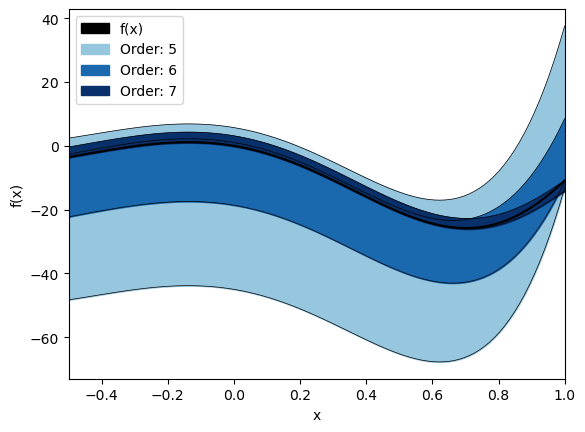

In [8]:
def func(x):
    if isinstance(x, taylor_model):
        return x * (x - 1.1) * (x + 2) * (x + 2.2) * (x + 2.5) * (x + 3) * sin(1.7 * x + 0.5)
    else:
        return x * (x - 1.1) * (x + 2) * (x + 2.2) * (x + 2.5) * (x + 3) * np.sin(1.7 * x + 0.5)

exp_point = {"x": 0.0}
rem_bound = int_d(0.0, 0.0)
domain = {"x": int_d(-0.5, 1.0)}

ax = plot_orders(func, rem_bound, exp_point, domain, orders=[5, 6, 7], buffer=0.0)
ax.set_xlabel('x')
ax.set_ylabel('f(x)');